# Introduction to ML Project : INN Hotels

### Problem Statement

## Description


### Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

 

### Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.



### Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

### Data Dictionary

* **Booking_ID:**  the unique identifier of each booking
* **no_of_adults:**  Number of adults
* **no_of_children:**  Number of Children
* **no_of_weekend_nights:**  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:**  Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:**  Type of meal plan booked by the customer:
* **Not Selected –**  No meal plan selected
* **Meal Plan 1 –**  Breakfast
* **Meal Plan 2 –**  Half board (breakfast and one other meal)
* **Meal Plan 3 –**  Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:**  Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:**  Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* **lead_time:**  Number of days between the date of booking and the arrival date
* **arrival_year:**  Year of arrival date
* **arrival_month:**  Month of arrival date
* **arrival_date:**  Date of the month
* **market_segment_type:**  Market segment designation.
* **repeated_guest:**  Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:**  Number of previous bookings that were canceled by the customer before the current booking
* **no_of_previous_bookings_not_canceled:**  Number of previous bookings not canceled by the customer before the current booking
* **avg_price_per_room:**  Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:**  Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:**  Flag indicating if the booking was canceled or not.

## Importing the required libraries

In [1]:
#!pip install pandas==2.0.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 -q --user

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_curve, roc_auc_score
%matplotlib inline

In [3]:
#loading the data
data=pd.read_csv("C:\\Users\punith yc\\Downloads\\INNHotelsGroup.csv")

In [4]:
#checking the first 5 rows
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
#checking the last 5 rows of data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
#check the shape of the dataset
data.shape

(36275, 19)

#### Observations: 
 There are 36275 rows and 19 columns in the data

In [7]:
data.duplicated().sum()

np.int64(0)

#### Observations: 
As there are no duplicate values in the data across all the columns, so its not required to handle the duplicate values in the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations: 
There are 5 object columns, 13 integer column and 1 float and all the columns dont have any null values and there are no duplicates in the data which means all the values are unique

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


#### Observations:
1. The average number of adults per booking is approximately 1.84, with a standard deviation of 0.52
2. The number of children in bookings is low, with an average of 0.10 and a standard deviation of 0.40
3. The average lead time is about 85.2 days, with a standard deviation of 85.9 days.
4. The average number of previous cancellations per booking is very low (0.02)
5. The average price per room is approximately 103.42, with a high standard deviation of 35.09
6. The average bookings on weekend nights is 0.81 and week nights is 2.2

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [10]:
#no of previous booking calculations
prev=data[data['no_of_previous_cancellations']==1]
prev['Booking_ID'].count()

np.int64(198)

#### Observations :
198 previous bookings are canceled by the customers before the current bookings

In [11]:
#no of adults per booking
adult_counts = data['no_of_adults'].value_counts()
print(adult_counts)

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64


#### Observations :
For 26108 bookings the no of adults were 2 and followed by 7695 bookings the were 1

In [12]:
#no of children per booking
children_counts = data['no_of_children'].value_counts()
print(children_counts)


no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


#### Observations :
For 33577 bookings the no of children is 0 and for 1618 bookings the no of children is 1

In [13]:
#room types preferred
room_type_counts = data['room_type_reserved'].value_counts()
print(room_type_counts)


room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


#### Observations :
Most of the people are booking to book the room_type_1 and 28130 bookings preferred this room type and the least room type preferred is room_type 3 which has least bookings

In [14]:
#car parking
car_parking_counts = data['required_car_parking_space'].value_counts()
print(car_parking_counts)


required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64


#### Observations:
majority of the bookings (35,151) do not require car parking, while 1124 bookings requires car parking

In [15]:
#special request
special_requests_counts = data['no_of_special_requests'].value_counts()
print(special_requests_counts)


no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64


#### Observations:
Most bookings (19,777) did not included any special requests followed by 11,373 bookings have 1 special request

In [16]:
#arrival year
data['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

#### Observations:
majority of bookings are happened in 2018 (29,761) and followed by 2017

In [17]:
#repeated guests
rep_guest=data[data['repeated_guest']==1]
rep_guest['Booking_ID'].count()

np.int64(930)

#### Observations:
out of 36275 bookings only 930 bookings are repeated guests (i.e the customers those who have previous nookings)

In [18]:
data['Booking_ID'].nunique()

36275

#### Observations:
The total number of unique bookings in the dataset is 36,275

In [19]:
data['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

#### Observations:
Most of the bookings are preferred for meal plan 1 and least bookings preferred meal plan 3

In [20]:
data.groupby(("room_type_reserved"))['avg_price_per_room'].mean()

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64

###### Observations :
The highest average price is for room type 6 which is 182 and the least average price is for room type is 73

**1. What are the busiest months in the hotel?**

In [21]:
Busiest_months= data['arrival_month'].value_counts()
print(Busiest_months)


arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64


#### Observations : 
The most busiest month is october which has 5317 bookings and followed by september which has 4611 bookings and the least busiest month is january with only 1014 bookings

**2. Which market segment do most of the guests come from?**

In [22]:
market_segment =data['market_segment_type'].value_counts(normalize=True) * 100

market_segment

market_segment_type
Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: proportion, dtype: float64

#### Observations:
most of the booking are coming from online segemnt with (63.9%) and followed by offline (29.02) and the bookings are coming from the aviation segement which is (0.34%)

**3. What are the differences in room prices in different market segments?**

In [23]:
price_by_segment = data.groupby('market_segment_type')['avg_price_per_room'].describe()

price_by_segment

,count,mean,std,min,25%,50%,75%,max
market_segment_type,,,,,,,,
Aviation,125.0,100.704000,8.538361,79.0,95.0,95.0,110.00,110.0
Complementary,391.0,3.141765,15.512972,0.0,0.0,0.0,0.00,170.0
Corporate,2017.0,82.911740,23.690001,31.0,65.0,79.0,95.00,220.0
Offline,10528.0,91.632679,24.995597,12.0,75.0,90.0,109.00,540.0
Online,23214.0,112.256855,35.220319,0.0,89.0,107.1,131.75,375.5


#### Observation :
1. The average price for Aviation segement is nearly 101 and median is 95 and the max is 110 euros
2. The average price for complementary segement is nearly 23 and median is 20.7 and the max is 170 euros
3. The average price for corporate segement is nearly 83 and median is 79 and the max is 179 euros
4. The average price for offline segement is nearly 91 and median is 90 and the max is 179 euros
5. The average price for online segement is nearly 111.3 and median is 107 and the max is 179 euros

**4. What percentage of bookings are canceled?**

In [24]:
cancel_percentage = data['booking_status'].value_counts(normalize=True)

cancel_percentage

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

#### Observations :
The cancell percentage of the bookings are 32.7%

**5. What percentage of repeating guests cancel?**

In [25]:
repeat_guest_data = data[data['repeated_guest'] == 1]
repeat_guest_cancel_percentage = repeat_guest_data['booking_status'].value_counts(normalize=True)*100
repeat_guest_cancel_percentage

booking_status
Not_Canceled    98.27957
Canceled         1.72043
Name: proportion, dtype: float64

#### Observations :
The repeated guests who cancelled the bookings is very small which is 1.72%

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

In [26]:
special_request_effect = (data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True)*100).unstack()

special_request_effect

booking_status,Canceled,Not_Canceled
no_of_special_requests,,
0,43.206755,56.793245
1,23.766816,76.233184
2,14.596700,85.403300
3,NaN,100.000000
4,NaN,100.000000
5,NaN,100.000000


#### Observations :
1. The bookings with 0 special requests has more booking cancellations than any other no of special requests and followed by the bookings with the 1 special requirement
2. the bookings with more than 3 special requirements has 0% cancellation rate

So having special reuirements has 0% cancellation rate and it doesnt affect for cancelling the bookings

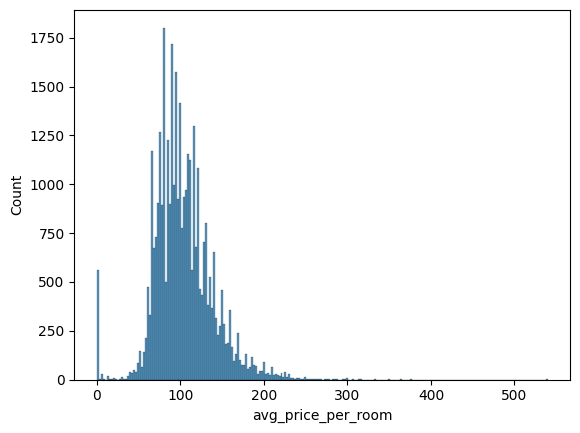

In [27]:
sns.histplot(data,x='avg_price_per_room')
plt.show()

#### Observation:
Most of the bookings average prices is skewed to right and there are less bookings with more than 200 of average price and most of the bookings lies near 100

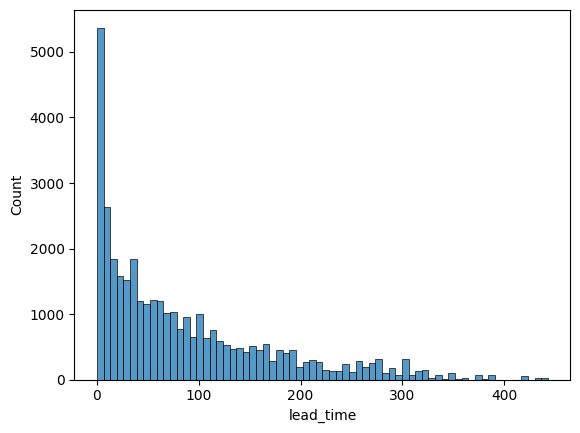

In [28]:
sns.histplot(data,x='lead_time')
plt.show()

#### Observations:
The distribution of lead times is skewed to the right and The majority of bookings have a short lead time,as the bookings made within a few days or weeks,There are a smaller number of bookings with longer lead times, which means they booked months in advance.

### Bivariate Analysis

C:\Users\punith yc\AppData\Local\Temp\ipykernel_13144\1543505466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='booking_status', y='lead_time', palette='Set3')


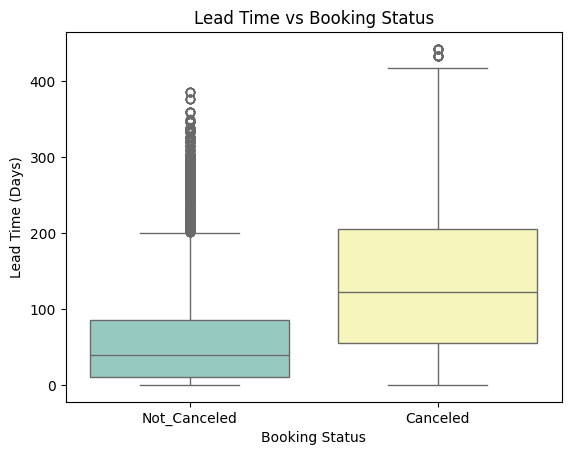

In [29]:
#leadtime vs booking status
sns.boxplot(data=data, x='booking_status', y='lead_time', palette='Set3')
plt.title('Lead Time vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (Days)')
plt.show()

#### Observations :
Cancelled booking have more outliers than the non cancelled bookings and The median lead time for canceled bookings is higher than the non-canceled bookings.

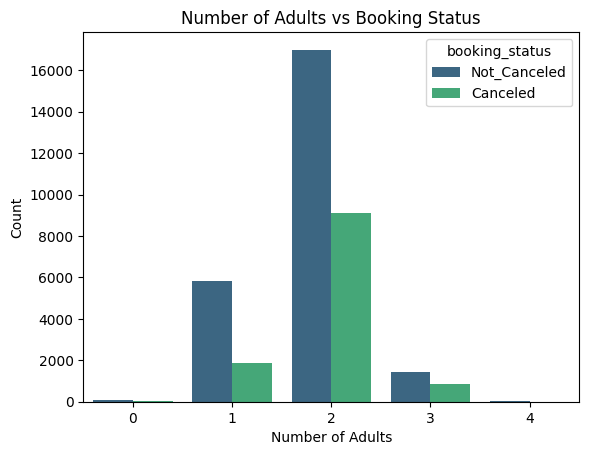

In [30]:
#no of adults vs booking status
sns.countplot(data=data, x='no_of_adults', hue='booking_status', palette='viridis')
plt.title('Number of Adults vs Booking Status')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.show()


#### Observations:
Most number of the bookings is for both cancelled and not cancelled for 2 adults and least bookings for both cancelled and not cancelled is for 0 adults and Very few people booked for 3 or 4 adults, and cancellations for these groups are also less

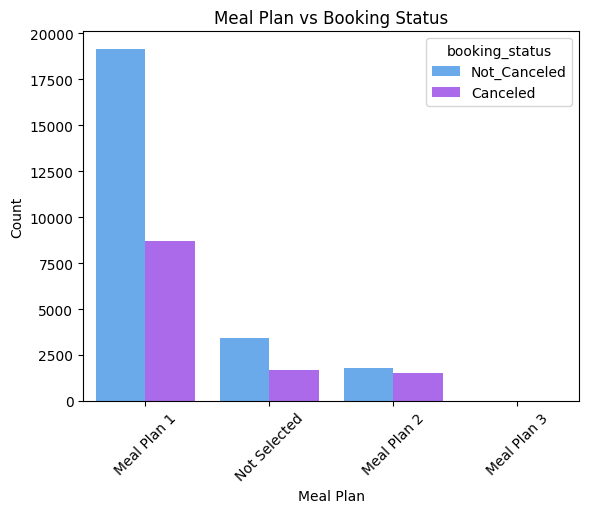

In [31]:
#meal plan time vs booking status
sns.countplot(data=data, x='type_of_meal_plan', hue='booking_status', palette='cool')
plt.title('Meal Plan vs Booking Status')
plt.xlabel('Meal Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Observations :
Most of the bookings both cancelled and not cancelled happened for meal plan 1 and least bookings both cancelled and not cancelled happened for meal plan 3 and Very few people preferred Meal Plan 2 or 3 and cancellations for these meal plans are also less.

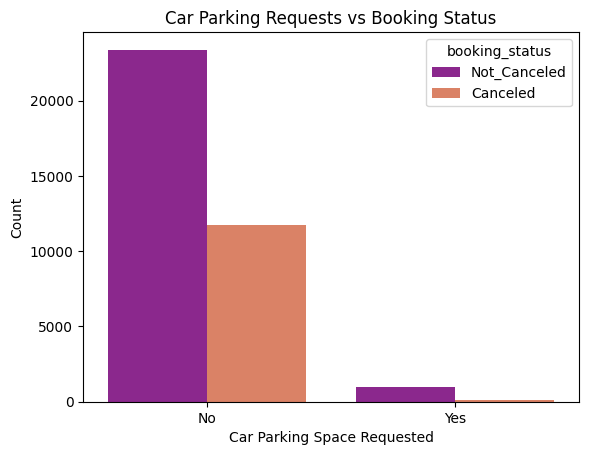

In [32]:
#car parking requests vs booking status
sns.countplot(data=data, x='required_car_parking_space', hue='booking_status', palette='plasma')
plt.title('Car Parking Requests vs Booking Status')
plt.xlabel('Car Parking Space Requested')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


#### Observations:
A large number of bookings happened without requesting the car parking space and the least bookings are requested for car parking space

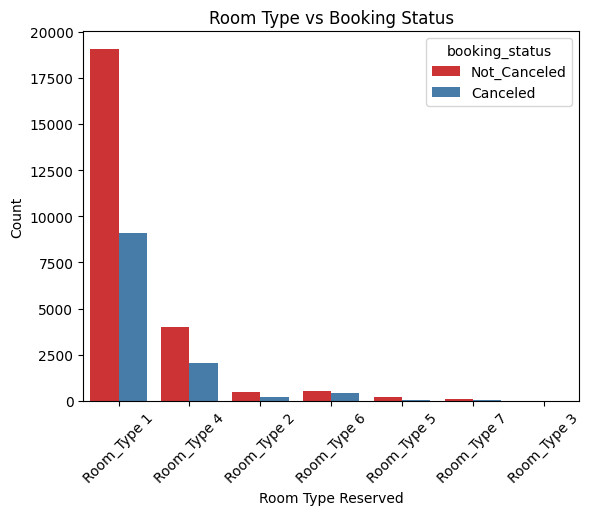

In [33]:
#room type reserved vs booking status
sns.countplot(data=data, x='room_type_reserved', hue='booking_status', palette='Set1')
plt.title('Room Type vs Booking Status')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Observations:
Thie room type1 has the highest number of bookings and also a highest number of cancellations compared to other room types and the room type 5,7 and 3 has lowest number of bookings and lowest number of cancellations

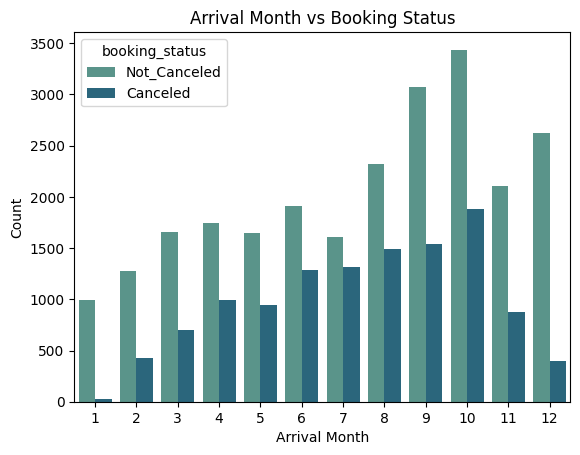

In [34]:
#arrival month vs booking status
sns.countplot(data=data, x='arrival_month', hue='booking_status', palette='crest')
plt.title('Arrival Month vs Booking Status')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.show()


#### Observations :
Most of the bookings happened for the month of 10 followed by 9 and 12 and the least bookings happened for the month 1

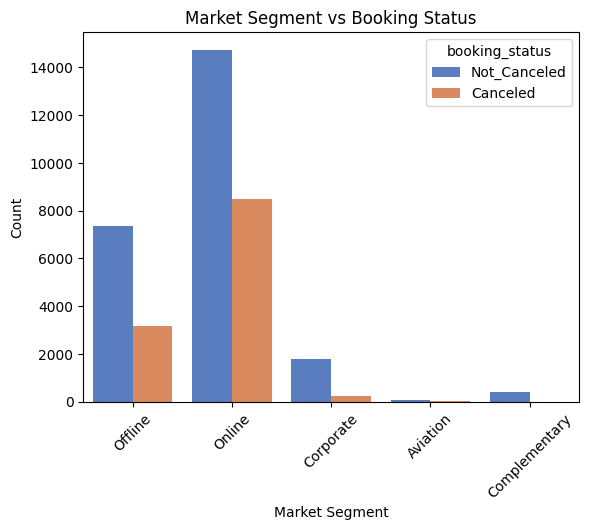

In [35]:
#market segment vs booking status
sns.countplot(data=data, x='market_segment_type', hue='booking_status', palette='muted')
plt.title('Market Segment vs Booking Status')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Observations:
Most of the bookings are from the Online segment followed by Offline and the least bookings are from aviation
Online segment has the highest cancellation rate followed by offline and the least cancellations happened for aviation

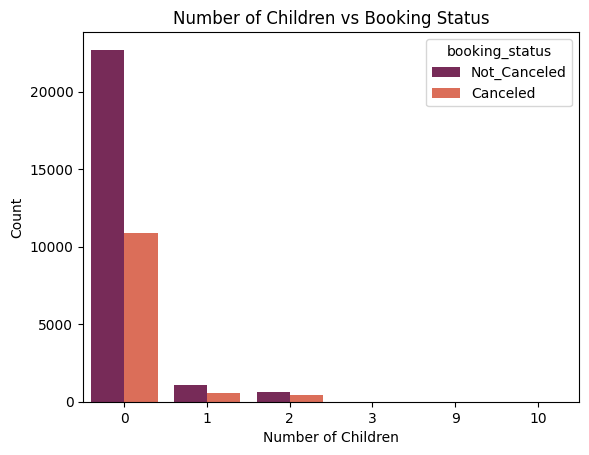

In [36]:
#no of children vs booking status
sns.countplot(data=data, x='no_of_children', hue='booking_status', palette='rocket')
plt.title('Number of Children vs Booking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


#### Observations:
Most of the bookings are happened with 0 children and followed by 1 children and the highest cancellations happened with 0 children followed by 1 children

C:\Users\punith yc\AppData\Local\Temp\ipykernel_13144\1352577561.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='market_segment_type', y='lead_time', palette='muted')


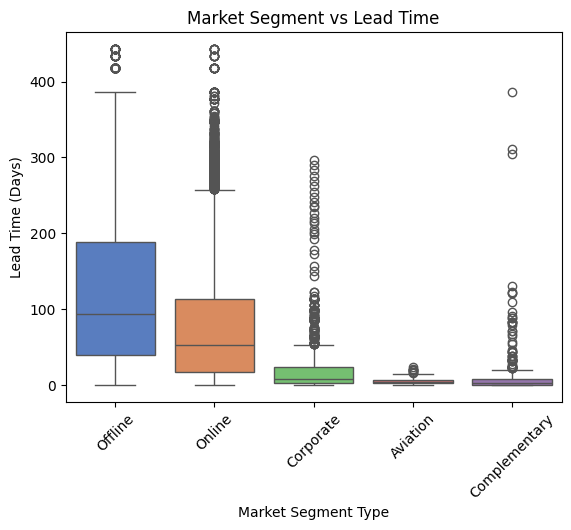

In [37]:
sns.boxplot(data=data, x='market_segment_type', y='lead_time', palette='muted')
plt.title('Market Segment vs Lead Time')
plt.xlabel('Market Segment Type')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()

#### Observations :
offline and online have highest median lead times compared to others and also have higher lead times and the median for aviation and complementary have less lead times and the median time for them also less

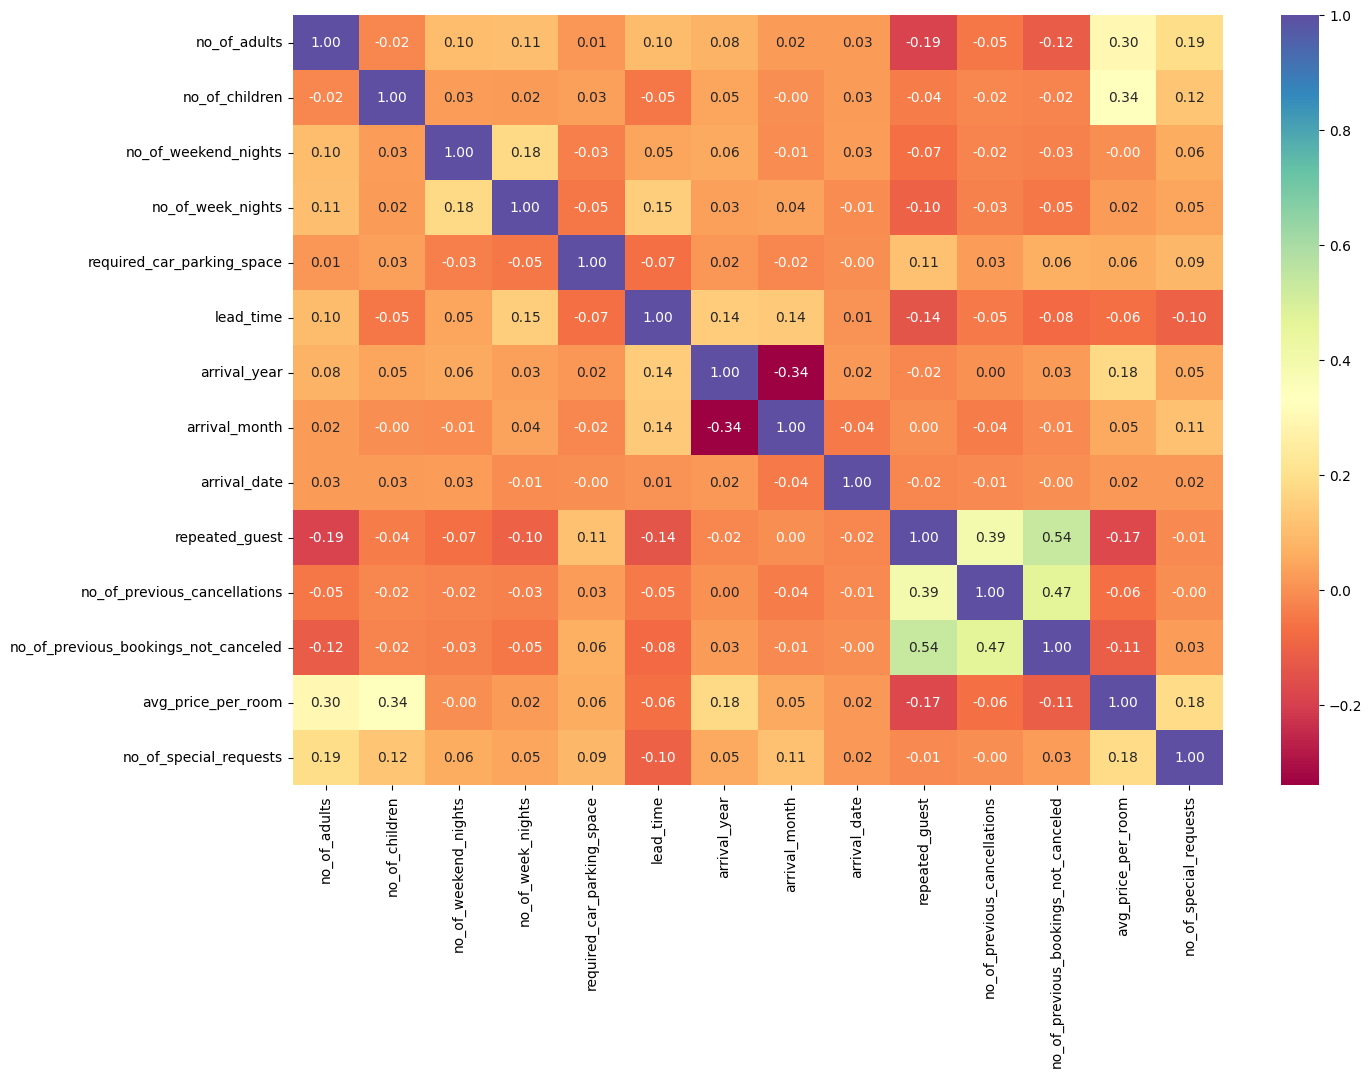

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True),annot=True, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
From the heatmap we can understand that repeated guest and no_of_previous_bookings_not_cancelled has highest positive correlation than the others

## Data Preprocessing and data preparation

In [39]:
#cheking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations: 
As there are no null values in the data across all the columns, so its not required to handle the missing values in the data

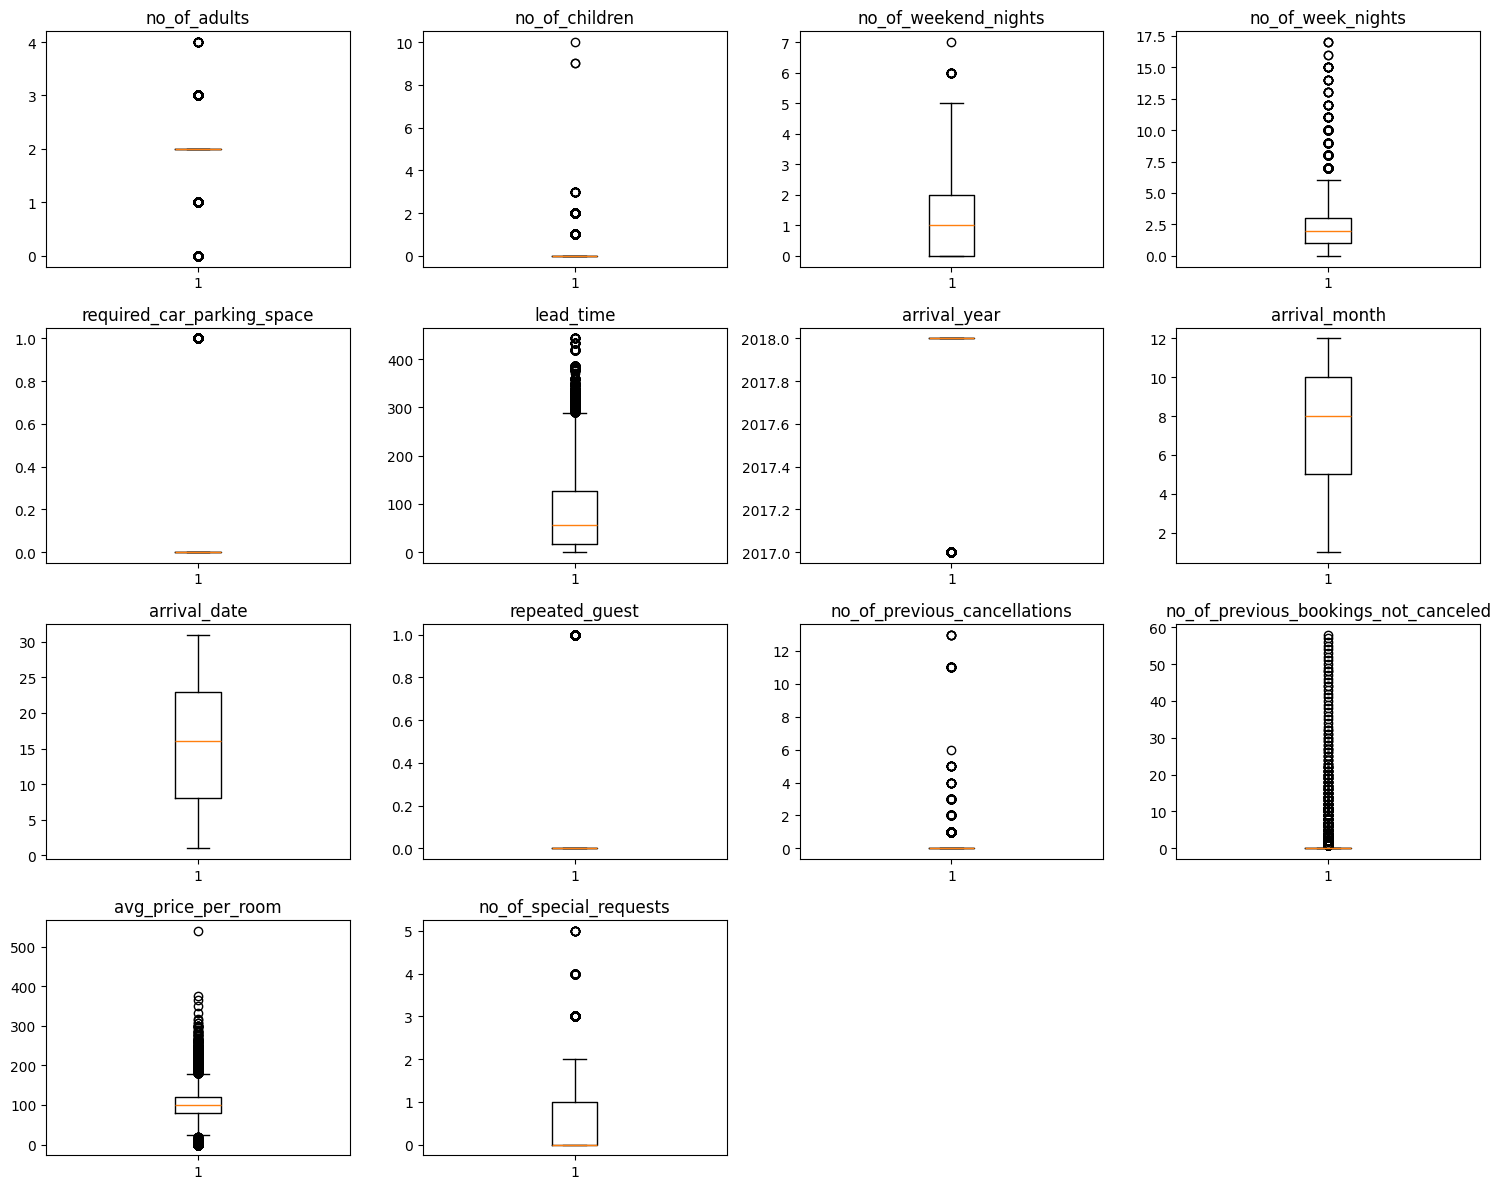

In [40]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations : 
1. The no of week nights, lead time, no_of_previous cancellations has more extreme values and the avergare price for room has both positive and nehative extreme values.
2. As there are outliers in the data, But here,i will not treat all the columns as they are proper values and i will be treating some of the columns.

In [41]:
col_list=data[['lead_time','no_of_previous_bookings_not_canceled','avg_price_per_room']]

In [42]:
#outlier treatment by using flooring and capping
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, col_list)

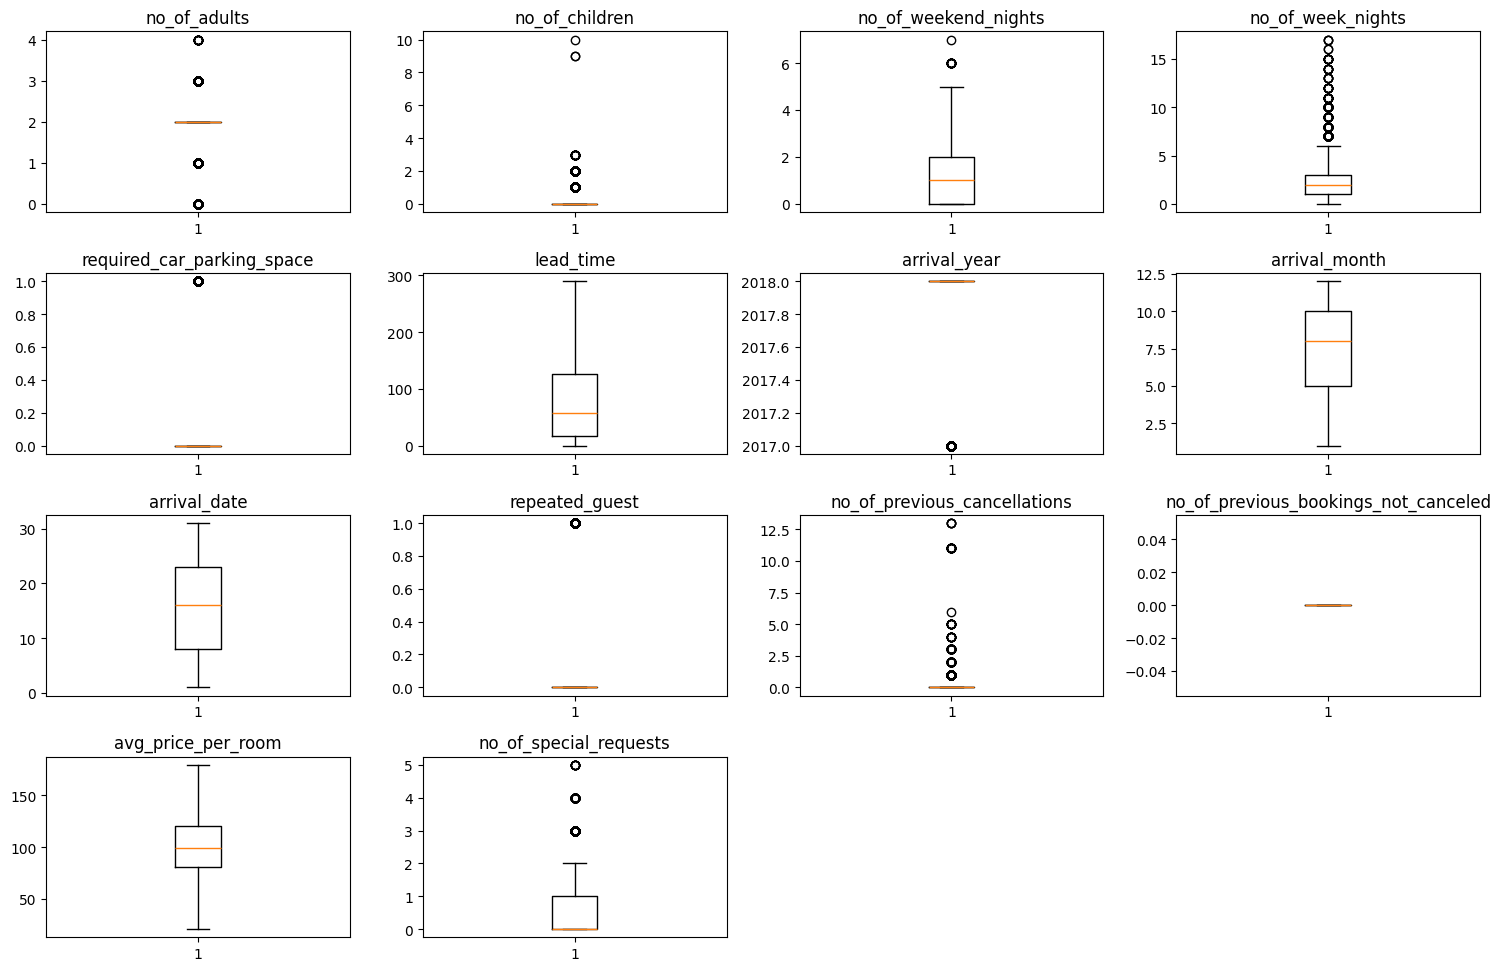

In [43]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##### Observations:
The outliers for the columns  week nights, lead time, no_of_previous cancellations  has been replaced by using flooring and capping method

In [44]:
# Replacing 'Cancelled' with 1 and 'Not Cancelled' with 0

data['booking_status'] = data['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})


C:\Users\punith yc\AppData\Local\Temp\ipykernel_13144\1372096151.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['booking_status'] = data['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})


#### Observations :
Here in the target column the values are in the form categorical data but while training the model requires numerical data so instead of creating dummy variables replaced the canceled as 1 and not canceled as 0

In [45]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [46]:
#encoding the categorical variables
X.drop('Booking_ID',axis=1,inplace=True) #dropping booking_id as it creates more sparsity

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X_encoded=pd.get_dummies(X,columns=categorical_columns,drop_first=True)
X_encoded

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224.0,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5.0,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1.0,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211.0,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48.0,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85.0,2018,8,3,0,...,False,False,True,False,False,False,False,False,False,True
36271,2,0,1,3,0,228.0,2018,10,17,0,...,False,False,False,False,False,False,False,False,False,True
36272,2,0,2,6,0,148.0,2018,7,1,0,...,False,False,False,False,False,False,False,False,False,True
36273,2,0,0,3,0,63.0,2018,4,21,0,...,False,False,False,False,False,False,False,False,False,True


In [47]:
# splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=1)

In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)


Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)


#### Observations :
1. The training set has 25392 rows of data and 27 columns
2. The testing set has 10883 rows of data and 27 columns

### Model Building

#### Logistic regression

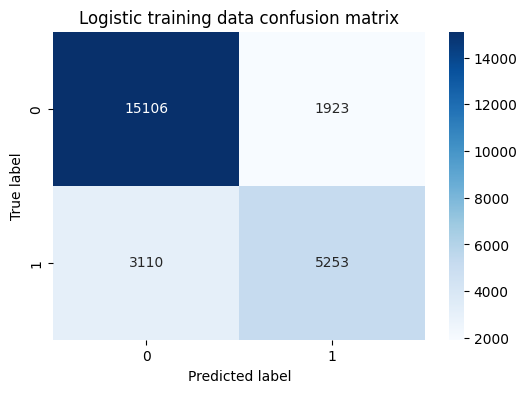

In [49]:
# Fitting the model on training data
model = LogisticRegression(solver="newton-cg", random_state=42)
model.fit(X_train, y_train)

y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Logistic training data confusion matrix")
plt.show()

In [50]:
#checking the model performance for training data
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

The accuracy for training data is : 0.8017879647132955
The recall for training data is : 0.6281238789907928
The precision for training data is : 0.7320234113712375
The f1_score for training data is : 0.6761052834802754


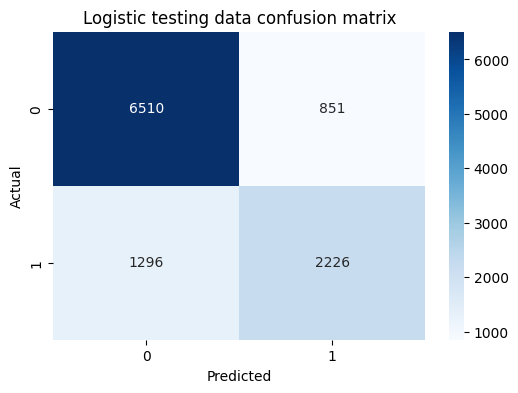

In [51]:
#building a model checking the performance for testing data
y_test_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic testing data confusion matrix")
plt.show()

In [52]:
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

The accuracy for test data is : 0.802719838279886
The recall for test data is : 0.6320272572402045
The precision for test data is : 0.7234319142021449
The f1_score for test data is : 0.6746476738899834


#### Observation :
Here the data set is slightly balanced because the minority class is positive class(cancelled) and majority class is negative class(not cancelled) so if i consider accuracy as a metric it gives a good score but the model can make biased predictions everything as not cancelled so in this case i use recall as performnce metric to actually identify the the actual cancellations and here the recall value for both the training and testing data is 63% which means the model is correctly able to find out 63% cancellations  and this indicates that the model is overfitting

### Model performance improvement

The recall score can be improved by reducing the false negatives and maximizing the false positives and this can be done by using 
1. Roc curve
2. precision recall curve

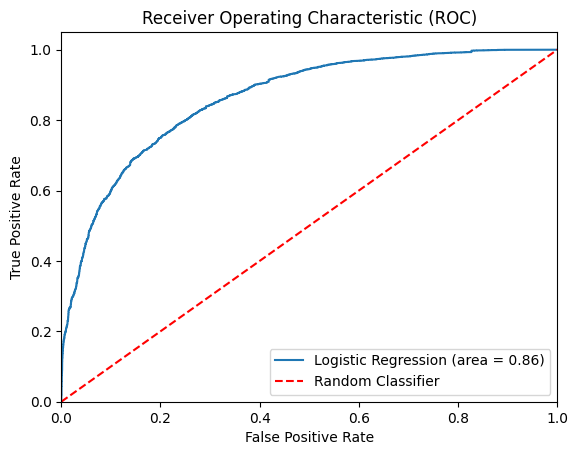

In [53]:
#plotting the 
logit_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [54]:
#finding the optimal cut off
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.31275114480819055


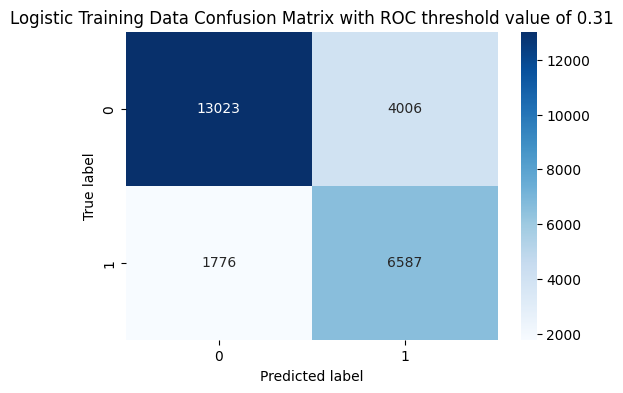

The accuracy for training data is : 0.7722904851921865
The recall for training data is : 0.7876360157838096
The precision for training data is : 0.6218257339752666
The f1_score for training data is : 0.6949778434268833


In [55]:
#constructing a model with threshold value of 0.31
model = LogisticRegression(solver="newton-cg", random_state=42)
model.fit(X_train, y_train)

y_train_prob = model.predict_proba(X_train)[:, 1]

y_train_pred = (y_train_prob >= 0.31).astype(int)

# Confusion matrix for training data
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Logistic Training Data Confusion Matrix with ROC threshold value of 0.31")
plt.show()

# Performance metrics for training data
print("The accuracy for training data is :", accuracy_score(y_train, y_train_pred))
print("The recall for training data is :", recall_score(y_train, y_train_pred))
print("The precision for training data is :", precision_score(y_train, y_train_pred))
print("The f1_score for training data is :", f1_score(y_train, y_train_pred))



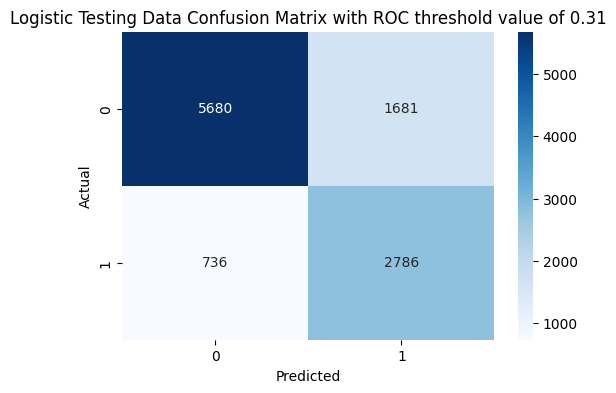

The accuracy for test data is : 0.7779105026187632
The recall for test data is : 0.7910278250993753
The precision for test data is : 0.6236847996418178
The f1_score for test data is : 0.6974590061334335


In [56]:
# Predict probabilities for the testing data
y_test_prob = model.predict_proba(X_test)[:, 1]

# Apply the optimal threshold (0.31) to get class predictions
y_test_pred = (y_test_prob >= 0.31).astype(int)

# Confusion matrix for testing data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Testing Data Confusion Matrix with ROC threshold value of 0.31")
plt.show()

# Performance metrics for testing data
print("The accuracy for test data is :", accuracy_score(y_test, y_test_pred))
print("The recall for test data is :", recall_score(y_test, y_test_pred))
print("The precision for test data is :", precision_score(y_test, y_test_pred))
print("The f1_score for test data is :", f1_score(y_test, y_test_pred))

#### Observations :
Here the model with Roc value 0.31 shows an improvement in recall and the precision has decreased which means the model is focusing more on capturing the false positives
Recall for training data has increased from 0.63 to 0.78
precision for training data has decreased from 0.73 to 0.62

### Optimal threshold value from precision-Recall curve

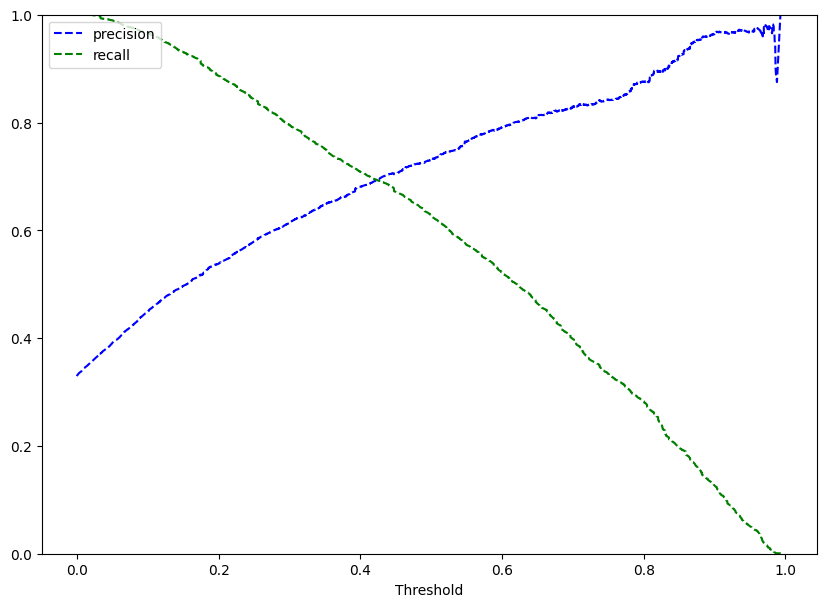

In [57]:
from sklearn.metrics import precision_recall_curve
y_scores = model.predict_proba(X_train)[:, 1]
prec, rec, thres = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_thres(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_thres(prec, rec, thres)
plt.show()

In [58]:
#finding the optimal threshold value from precision recall curve
idx = np.where((rec == prec) == True)[0][0]
optimal_threshold_prec_rec = thres[idx]
print(optimal_threshold_prec_rec)

0.423068903304694


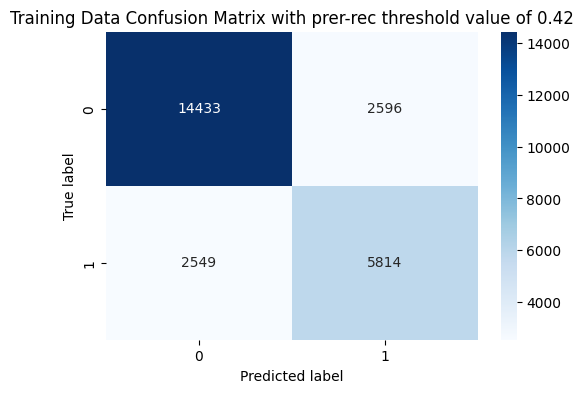

The accuracy for training data is : 0.7973771266540642
The recall for training data is : 0.6952050699509745
The precision for training data is : 0.6913198573127229
The f1_score for training data is : 0.6932570202110535


In [59]:
# Building the model with the threshold value of 0.42 for training data
y_prob = model.predict_proba(X_train)[:, 1]

y_train_pred = (y_prob >= 0.42).astype(int)

# Confusion Matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Training Data Confusion Matrix with prer-rec threshold value of 0.42")
plt.show()

# Performance metrics for training data
print("The accuracy for training data is :", accuracy_score(y_train, y_train_pred))
print("The recall for training data is :", recall_score(y_train, y_train_pred))
print("The precision for training data is :", precision_score(y_train, y_train_pred))
print("The f1_score for training data is :", f1_score(y_train, y_train_pred))



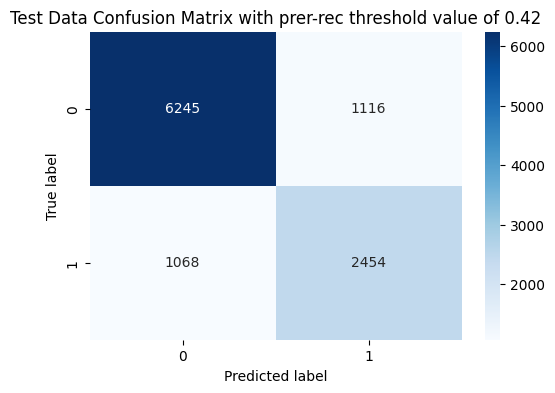

The accuracy for test data is : 0.7993200404300285
The recall for test data is : 0.696763202725724
The precision for test data is : 0.6873949579831933
The f1_score for test data is : 0.6920473773265652


In [60]:
y_prob_test = model.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.42 for test data
y_test_pred = (y_prob_test >= 0.42).astype(int)

# Confusion Matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Test Data Confusion Matrix with prer-rec threshold value of 0.42")
plt.show()

# Performance metrics for test data
print("The accuracy for test data is :", accuracy_score(y_test, y_test_pred))
print("The recall for test data is :", recall_score(y_test, y_test_pred))
print("The precision for test data is :", precision_score(y_test, y_test_pred))
print("The f1_score for test data is :", f1_score(y_test, y_test_pred))

#### Observations :
Since the model the precion recall threshold value of 0.42 has 69% recall for both training and testing data compared to the previous model with roc curve with threshold value of 0.31 has better recall value than this 

## Final model selection for Logistic regression

1. The default logistic regression model has good accuracy but lower recall.
2. The ROC threshold model (0.31) has improved recall by providing a better balance between precision and recall by making it more accurate for predicting the false positives.
3. The precision-recall threshold model (0.42) improves precision but decreased recall.
4. So, the ROC threshold model (0.31) performs well compared the other models by providing a better trade-off between precision and recall, So the ROC threshold model (0.31) is the most effective model

### Knn classifier

In [61]:
#building a model for training data
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

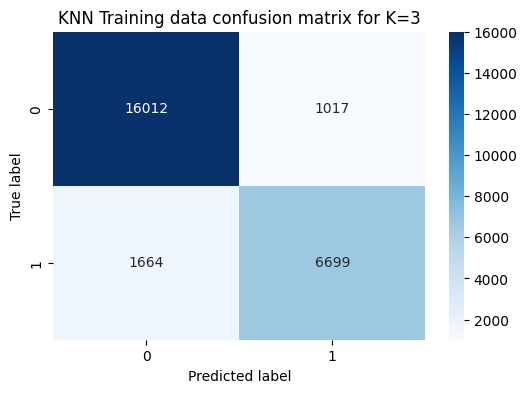

In [62]:
y_pred=model.predict(X_train)
cm = confusion_matrix(y_train, y_pred) 
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="", cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('KNN Training data confusion matrix for K=3')
plt.show()

In [63]:
# checking the performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


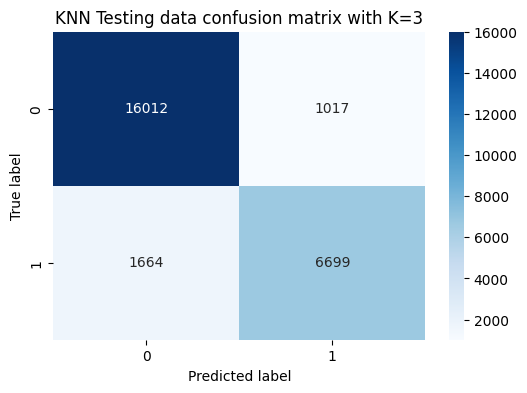

In [64]:
#building and checking the performance for testing data
y_test_pred=model.predict(X_test)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('KNN Testing data confusion matrix with K=3')
plt.show()

In [65]:
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

The accuracy for test data is : 0.8041900211338785
The recall for test data is : 0.6592844974446337
The precision for test data is : 0.7138026437134952
The f1_score for test data is : 0.6854612546125461


#### Observations :
Here we can see a good recall value for both training and testing data which means the model is performing well but there is a difference between the training recall and testing recall which suggests that model is slightly overfitting.

## Fine tuning and model performance improvement

### knn with different set of neighbours
Building a KNN model to find the optimal value of K to check if there is any improvement in the model.

In [66]:
# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

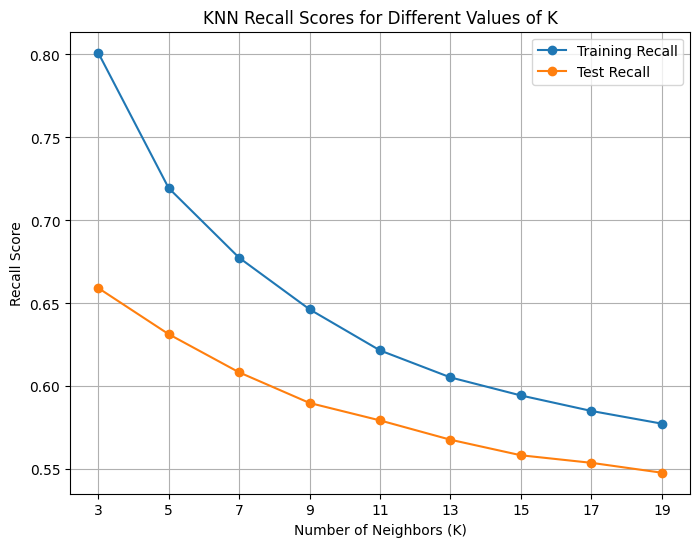

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

### Observation and Final model selection for KNN

1. The recall scores for both training and test sets are highest when k=3. This smeanss that with k=3, the model is better at identifying positive calsses in both the training and test data compared to other values of k.
2. As the k value increases the recall value decreases and it leads to underfitting.
3. As the k value decreses the model tries to learn all the underlying patterns in the data and it leads to overfitting.
4. So the model with the value k=3 model performs well between capturing positive instances effectively and generalizing well to new data.

### Naive bayes classifier

In [68]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

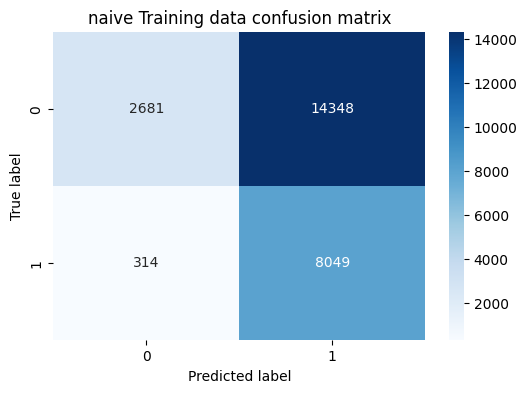

In [69]:
y_pred=nb.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('naive Training data confusion matrix')
plt.show()

In [70]:
#checking the model performance for training data
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

The accuracy for training data is : 0.4225740390674228
The recall for training data is : 0.9624536649527682
The precision for training data is : 0.35937848819038265
The f1_score for training data is : 0.5233420026007802


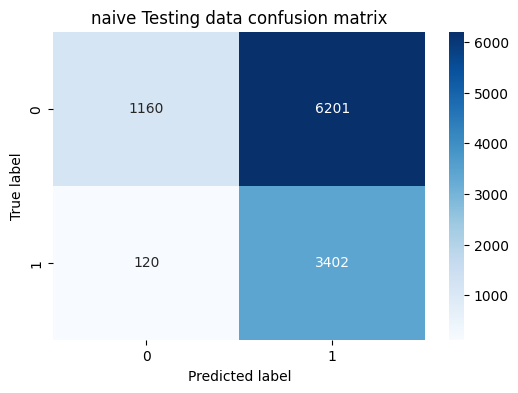

The accuracy for test data is : 0.4191858862446017
The recall for test data is : 0.9659284497444633
The precision for test data is : 0.3542642924086223
The f1_score for test data is : 0.5184


In [71]:
#building and checking performance for testing data
y_test_pred=nb.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('naive Testing data confusion matrix')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations :
1. Here the model shows a high recall value for both training and testing data which indicates that the model is good at identifying the positive classes.
2. But here the model has low precisoin and accuracy so the model making errors in predicting the negative classes
3. As the model has highest recall value for both training and unseen the model is making biased prediction as positive class.

### SVM classifier

In [72]:
# fitting SVM model
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

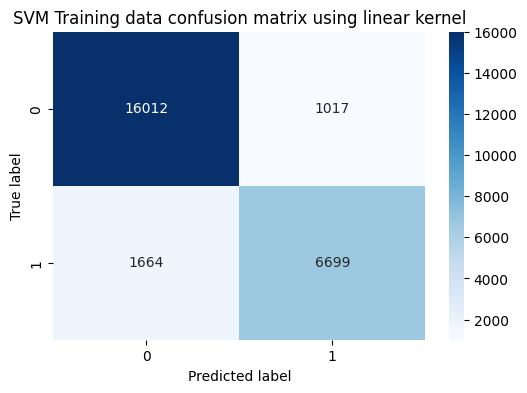

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


In [73]:
#confusion matrix
y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Training data confusion matrix using linear kernel')
plt.show()

#performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

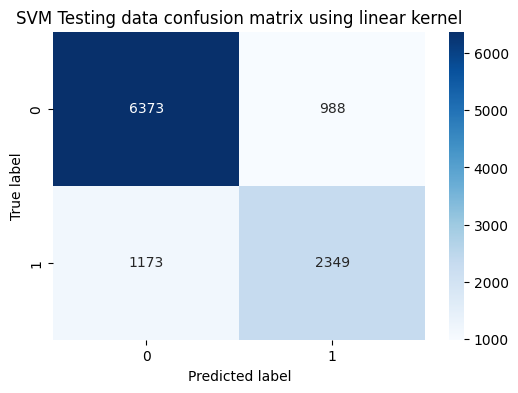

The accuracy for test data is : 0.8014334282826426
The recall for test data is : 0.6669505962521295
The precision for test data is : 0.703925681750075
The f1_score for test data is : 0.6849394955532877


In [74]:
#building and checking performance for testing data
y_test_pred=svm.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Testing data confusion matrix using linear kernel')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations :
1. The F1_score for testing data is less compared to training data.
2. The recall of training data to testing has reduced significantly which indicates the chances of overfitting
3. The model has good precision value than recall value which suggests that model is not suitable for making accurate predictions of positive class. 

### Svm with different set of parameters
The performance can be increased by using
1. Trying with different kernels
2. Adding gamma and c values

#### Support Vector Machine (Kernel = "Polynomial" , Degree = 2 )

In [75]:
svm = SVC(kernel='poly',degree=2)
svm.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

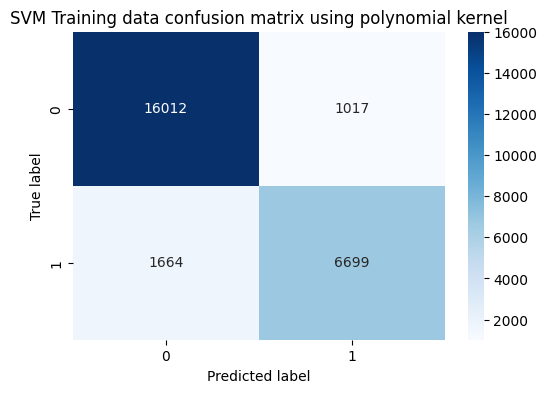

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


In [76]:
#confusion matrix
y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Training data confusion matrix using polynomial kernel')
plt.show()

#performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

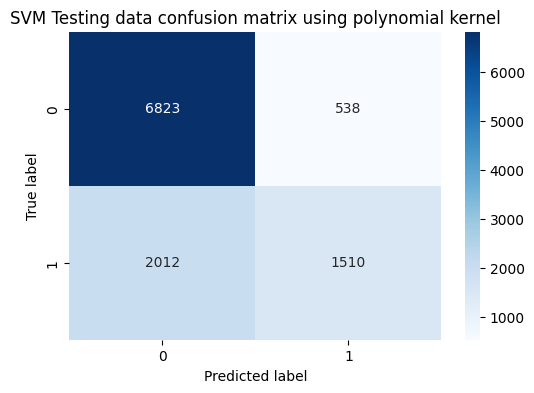

The accuracy for test data is : 0.7656896076449509
The recall for test data is : 0.4287336740488359
The precision for test data is : 0.7373046875
The f1_score for test data is : 0.5421903052064632


In [77]:
#building a model and checking performance for testing data
y_test_pred=svm.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Testing data confusion matrix using polynomial kernel')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations :
1. The performance for testing data has not increased.
2. The f1_score for test data drops which suggest that the model is not having having the trade off between precision and recall
3. As there is a significant drop in all the performance metrics there is a high chance of model leads to overfitting.

### Support Vector Machine (Kernel = "Polynomial" , Degree = 3 )

In [78]:
svm = SVC(kernel='poly',degree=3)
svm.fit(X_train,y_train)

SVC(kernel='poly')

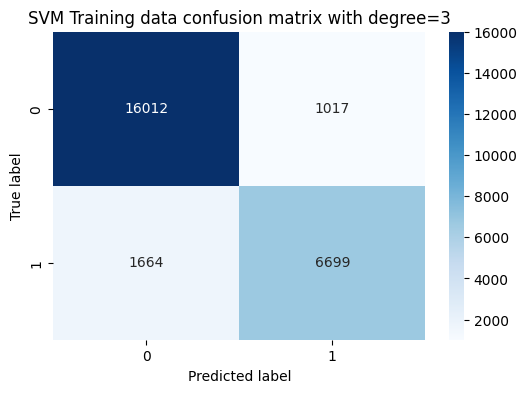

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


In [79]:
#confusion matrix
y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Training data confusion matrix with degree=3')
plt.show()

#performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

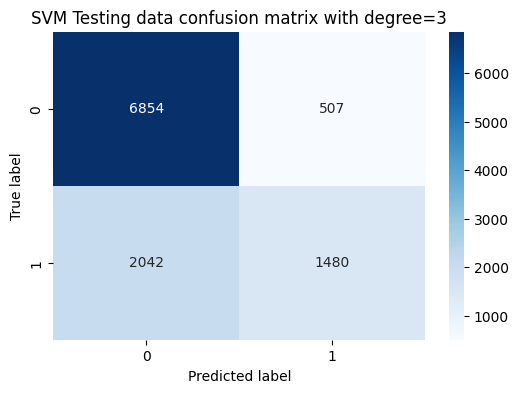

The accuracy for test data is : 0.7657814940733254
The recall for test data is : 0.4202157864849517
The precision for test data is : 0.7448414695520886
The f1_score for test data is : 0.5373025957524051


In [80]:
#building a model and checking performance for testing data
y_test_pred=svm.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Testing data confusion matrix with degree=3')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations :
1. There is no improvement in performance of testing data which indicates increasing the polynomial degree doesnt help for this data.
2. The recall agains drops to 42% and the precision is high so the model is not suitable for making accurate predictions for positive cases
3. The f1_score for test data drops which suggest that the model is not having having the trade off between precision and recall
4. As there is a significant drop in all the performance metrics there is a high chance of model leads to overfitting.

### Support Vector Machine (Kernel = "Rbf")

In [81]:
# fitting SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

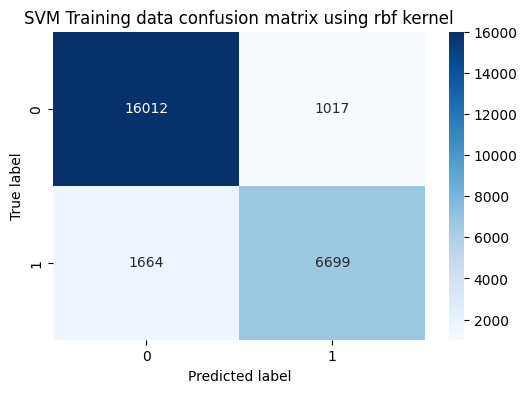

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


In [82]:
#confusion matrix
y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Training data confusion matrix using rbf kernel')
plt.show()

#performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

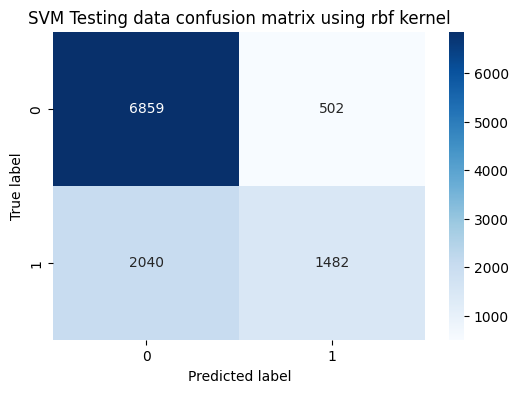

The accuracy for test data is : 0.7664246990719471
The recall for test data is : 0.42078364565587734
The precision for test data is : 0.7469758064516129
The f1_score for test data is : 0.5383218307301126


In [83]:
#building a model and checking performance for testing data
y_test_pred=svm.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Testing data confusion matrix using rbf kernel')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations:
1. There is no significant improvement in testing performance with the RBF kernel compared to polynomial kernels.
2. The recall remains low at 42%, indicating the model struggles to identify positive cases correctly and the precision is higher.
3. The F1 score for test data is low, it shows a poor trade-off between precision and recall.
4. The high performance on training data than the testing data suggests that the model is overfitting

### Support Vector Machine (Gamma = 0.00000025)

In [84]:
svm._gamma

np.float64(2.556010529278913e-07)

In [85]:
svm = SVC(kernel='poly',degree=3,gamma=0.00000025)
svm.fit(X_train,y_train)

SVC(gamma=2.5e-07, kernel='poly')

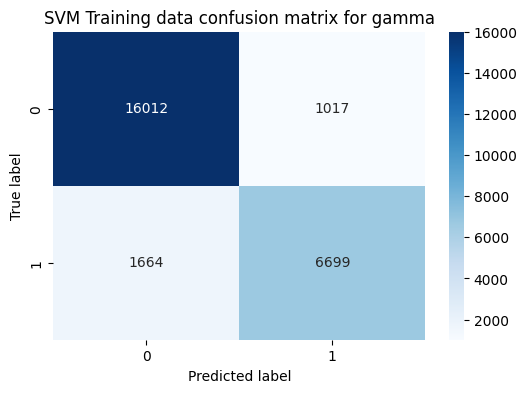

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


In [86]:
#confusion matrix
y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Training data confusion matrix for gamma')
plt.show()

#performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

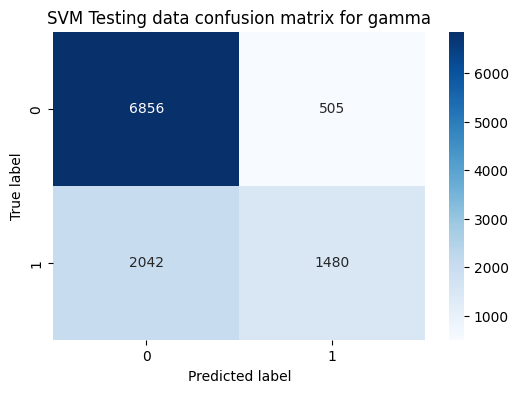

The accuracy for test data is : 0.7659652669300744
The recall for test data is : 0.4202157864849517
The precision for test data is : 0.7455919395465995
The f1_score for test data is : 0.5374977301616125


In [87]:
#building a model and checking performance for testing data
y_test_pred=svm.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Testing data confusion matrix for gamma')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations :
1. There is no significant improvement in testing performance with the RBF kernel compared to polynomial kernels.
2. The recall remains low at 42%, indicating the model struggles to identify positive cases correctly and the precision is higher.
3. The F1 score for test data is low, it shows a poor trade-off between precision and recall.
4. The high performance on training data than the testing data suggests that the model is overfitting so adding gamma value didn't improve the performance of the model.

#### Increasing the value of gamma to  0.00000050

In [88]:
svm = SVC(kernel='poly',degree=3,gamma=0.00000050)
svm.fit(X_train,y_train)

SVC(gamma=5e-07, kernel='poly')

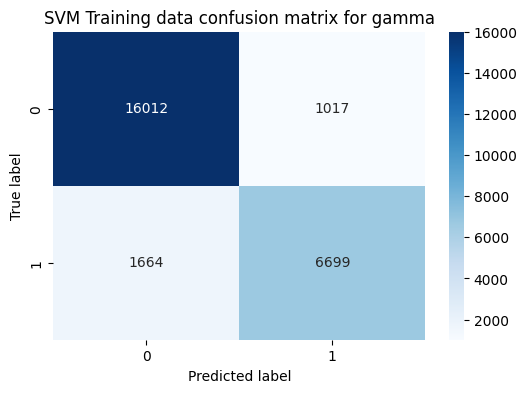

The accuracy for training data is : 0.8944155639571518
The recall for training data is : 0.8010283391127586
The precision for training data is : 0.8681959564541213
The f1_score for training data is : 0.8332607749238137


In [89]:
#confusion matrix
y_pred=model.predict(X_train)
cm=confusion_matrix(y_train,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Training data confusion matrix for gamma')
plt.show()

#performance
print("The accuracy for training data is :",accuracy_score(y_train,y_pred))
print("The recall for training data is :",recall_score(y_train,y_pred))
print("The precision for training data is :",precision_score(y_train,y_pred))
print("The f1_score for training data is :",f1_score(y_train,y_pred))

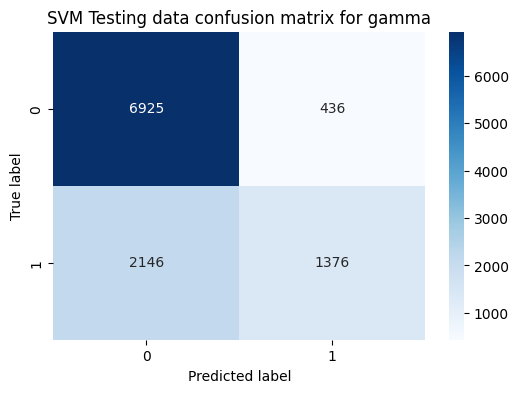

The accuracy for test data is : 0.7627492419369659
The recall for test data is : 0.39068710959682
The precision for test data is : 0.7593818984547461
The f1_score for test data is : 0.5159355080614924


In [90]:
#building a model and checking performance for testing data
y_test_pred=svm.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title('SVM Testing data confusion matrix for gamma')
plt.show()
#performance
print("The accuracy for test data is :",accuracy_score(y_test,y_test_pred))
print("The recall for test data is :",recall_score(y_test,y_test_pred))
print("The precision for test data is :",precision_score(y_test,y_test_pred))
print("The f1_score for test data is :",f1_score(y_test,y_test_pred))

#### Observations :
1. There is no significant improvement in testing performance with the RBF kernel compared to polynomial kernels.
2. The recall drops further to 39%, indicating an even poorer ability to correctly identify positive cases and the precision is high
3. The F1-score for test data decreases to 0.515, it shows a poor trade-off between precision and recall.
4. The high performance on training data than the testing data suggests that the model is overfitting so increasing gamma value didn't improve the performance of the model.

## Final model selection for svm

1. The SVM with Linear Kernel performs well compared to all the other svm models
2. It has higher recall value (66.7%) and F1-score (68.49%) on test data compared to all the models performance on test data
3. the linear kernel model has less overfitting compared to all the other models.

## Comparing all the models and final model selection

1. Logistic regression is the best performing model compared to all the other models which has a highest recall of (79.1%) and a  F1-score (69.7%), indicating a good balance between precision and recall and The model generalizes well on test data without significant overfitting.
2. KNN (K=3) and SVM (Linear Kernel) also has a good performance performance:
3. Both models have higher accuracy nearly (80%) and precision (70%) but lower recall compared to logistic regression.
4. Overall Logistic Regression is the best-performing model as it achieves a good trade-off between recall, precision, and F1-score

### Recommendations

1. Build loyalty by offering rewards for direct bookings and repeat stays like Provide exclusive benefits,increasing special requests
2. Provide discounts or added benefits for fully prepaid bookings.
3. Introduce dynamic pricing to incentivize early bookings and charge premiums for last-minute changes or cancellations.
4. Consider implementing stricter cancellation policies, such as partial refunds or non-refundable booking options to avoid cancellations.
